In [29]:
import pandas as pd

In [30]:
df1=pd.read_csv('./서울특별시_자치구별 이용자유형별 대중교통 이용건수_2024년_2.csv', encoding='utf-8')

In [31]:
df1.columns

Index(['연도', '구', '소계', '버스', '지하철', '택시'], dtype='object')

In [32]:
df2=pd.read_csv('./car_long.csv', encoding='utf-8')

In [33]:
df2.columns

Index(['district_id', 'district', 'year', 'car_count', 'car_diff'], dtype='object')

In [34]:
df2.head

<bound method NDFrame.head of      district_id district  year  car_count  car_diff
0              1      종로구  2020      50060       NaN
1              1      종로구  2021      50049    -11.00
2              1      종로구  2022      50832    783.00
3              1      종로구  2023      51000    168.00
4              1      종로구  2024      50482   -518.00
..           ...      ...   ...        ...       ...
145           25      강동구  2021     152003   6877.00
146           25      강동구  2022     151875   -128.00
147           25      강동구  2023     153678   1803.00
148           25      강동구  2024     154522    844.00
149           25      강동구  2025     167473  12951.00

[150 rows x 5 columns]>

In [35]:
df2 = df2[~df2['year'].isin([2020, 2025])]

In [36]:
df2

,district_id,district,year,car_count,car_diff
1,1,종로구,2021,50049,-11.00
2,1,종로구,2022,50832,783.00
3,1,종로구,2023,51000,168.00
4,1,종로구,2024,50482,-518.00
7,2,중구,2021,53107,1947.00
...,...,...,...,...,...
142,24,송파구,2024,244079,-1518.00
145,25,강동구,2021,152003,6877.00
146,25,강동구,2022,151875,-128.00
147,25,강동구,2023,153678,1803.00


In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연도      100 non-null    int64 
 1   구       100 non-null    object
 2   소계      100 non-null    object
 3   버스      100 non-null    object
 4   지하철     100 non-null    object
 5   택시      100 non-null    object
dtypes: int64(1), object(5)
memory usage: 4.8+ KB


In [38]:
df1.columns

Index(['연도', '구', '소계', '버스', '지하철', '택시'], dtype='object')

In [39]:
df1.dtypes

연도      int64
구      object
소계     object
버스     object
지하철    object
택시     object
dtype: object

In [40]:
cols = ['소계', '버스', '지하철', '택시']

for c in cols:
    df1[c] = (
        df1[c]
        .str.replace(',', '', regex=False)
        .astype(int)
    )

In [41]:
df1.describe()

,연도,소계,버스,지하철,택시
count,100.00,100.00,100.00,100.00,100.00
mean,2022.50,134997412.58,59278241.14,66560936.53,9158234.91
std,1.12,52439313.39,17100364.79,36717932.00,5117461.86
min,2021.00,66752284.00,29859594.00,19830665.00,3556554.00
25%,2021.75,96055099.75,46170210.25,36366522.75,6202428.00
50%,2022.50,118954686.00,58450700.50,56552112.00,7909313.50
75%,2023.25,167148753.00,69437945.25,89981585.25,10891454.50
max,2024.00,322927844.00,111266706.00,179953430.00,31707708.00


In [42]:
pd.options.display.float_format = '{:.2f}'.format

In [43]:
df1[['연도', '버스', '지하철', '택시']].corr()

,연도,버스,지하철,택시
연도,1.00,0.20,0.17,-0.06
버스,0.20,1.00,0.55,0.53
지하철,0.17,0.55,1.00,0.78
택시,-0.06,0.53,0.78,1.00


In [67]:
import matplotlib.pyplot as plt

In [66]:
plt.rcParams['font.family'] = 'Malgun Gothic'   # 맑은 고딕
plt.rcParams['axes.unicode_minus'] = False      # 마이너스 깨짐 방지

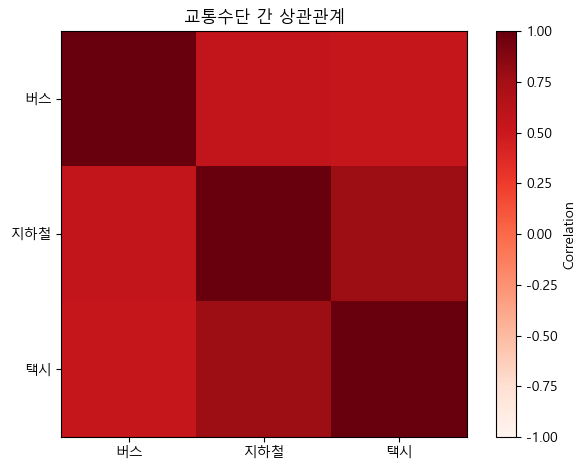

In [68]:
import matplotlib.pyplot as plt
import numpy as np

corr = df1[['버스','지하철','택시']].corr()

plt.imshow(corr, cmap='Reds', vmin=-1, vmax=1)
plt.colorbar(label='Correlation')

plt.xticks(
    ticks=np.arange(len(corr.columns)),
    labels=corr.columns
)
plt.yticks(
    ticks=np.arange(len(corr.columns)),
    labels=corr.columns
)

plt.title('교통수단 간 상관관계')
plt.tight_layout()
plt.show()

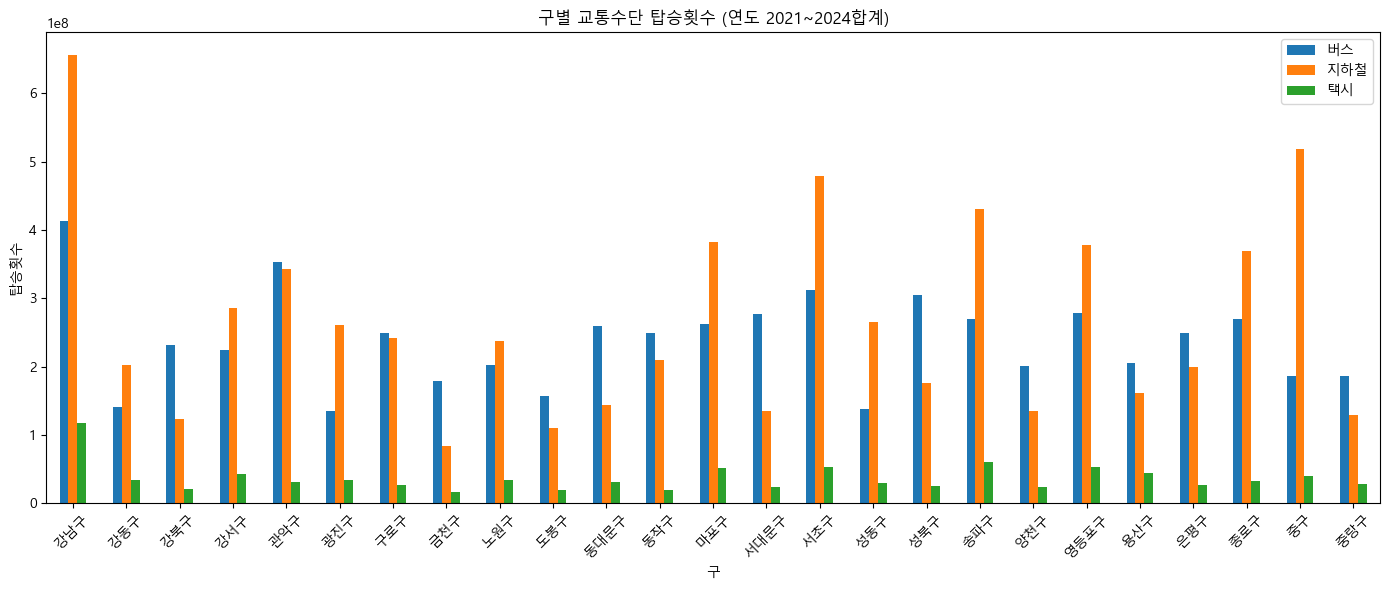

In [46]:

# 구별 합계
district_sum = (
    df1
    .groupby('구')[['버스', '지하철', '택시']]
    .sum()
)

# 막대그래프
district_sum.plot(kind='bar', figsize=(14,6))
plt.title('구별 교통수단 탑승횟수 (연도 2021~2024합계)')
plt.xlabel('구')
plt.ylabel('탑승횟수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
df2.to_csv('df2.csv', index=False, encoding='utf-8-sig')

In [73]:
df2.head()

,district_id,구,연도,car_count,car_diff
1,1,종로구,2021,50049,-11.00
2,1,종로구,2022,50832,783.00
3,1,종로구,2023,51000,168.00
4,1,종로구,2024,50482,-518.00
7,2,중구,2021,53107,1947.00


In [74]:
df2.describe()

,district_id,연도,car_count,car_diff
count,100.00,100.00,100.00,100.00
mean,13.00,2022.50,127183.23,624.43
std,7.25,1.12,50076.37,2070.99
min,1.00,2021.00,50049.00,-3984.00
25%,7.00,2021.75,95333.00,-478.25
50%,13.00,2022.50,118517.00,195.00
75%,19.00,2023.25,151636.50,1508.00
max,25.00,2024.00,256099.00,9965.00


In [75]:
df2.columns

Index(['district_id', '구', '연도', 'car_count', 'car_diff'], dtype='object')

In [76]:
df2.groupby('year')['car_diff'].mean().plot()

KeyError: 'year'

In [71]:
df2.groupby('district')['car_diff'].mean().sort_values()

KeyError: 'district'

In [70]:
df2.groupby('year')['car_diff'].mean()

KeyError: 'year'

In [69]:
df2.groupby('year')['car_diff'].std()

# “서울 구별 자동차 증감은 2021년 이후 증가세가 지속적으로 둔화되었으며,
# 2023년에는 지역 간 변동성이 가장 크게 나타났고,
# 2024년에는 평균적으로 감소 전환과 함께 변동성도 완화되었다.”

KeyError: 'year'

In [55]:
df1.to_csv('df1.csv', index=False, encoding='utf-8-sig')

In [56]:
df2 = df2.rename(columns={
    'district': '구',
    'year': '연도'
})

In [57]:
set(df1['구']) - set(df2['구'])
set(df2['구']) - set(df1['구'])

set()

In [58]:
df = pd.merge(
    df1,
    df2,
    on=['구', '연도'],
    how='inner'
)

In [77]:
df

,연도,구,소계,버스,지하철,택시,자동차_대수,자동차_증감
0,2021,종로구,141759969,57821751,75771163,8167055,50049,-11.00
1,2021,중구,149856039,39190006,100938579,9727454,53107,1947.00
2,2021,용산구,87031985,43905878,32335411,10790696,79486,3005.00
3,2021,성동구,96087425,31552270,56470250,8064905,106435,905.00
4,2021,광진구,95731490,29859594,56633974,9237922,98658,-114.00
...,...,...,...,...,...,...,...,...
95,2024,관악구,191528043,91648849,92102308,7776886,117936,-950.00
96,2024,서초구,225955483,81739104,130172545,14043834,176628,491.00
97,2024,강남구,322927844,111266706,179953430,31707708,256099,5654.00
98,2024,송파구,208052956,71926631,120662352,15463973,244079,-1518.00


In [78]:
df[['버스','지하철','택시','car_diff']].corr()

KeyError: "['car_diff'] not in index"

In [61]:
df = (
    df
    .rename(columns={
        'car_count': '자동차_대수',
        'car_diff': '자동차_증감'
    })
    .drop(columns=['district_id'])
)

In [62]:
df.to_csv('df.csv', index=False, encoding='utf-8-sig')

In [63]:
df

,연도,구,소계,버스,지하철,택시,자동차_대수,자동차_증감
0,2021,종로구,141759969,57821751,75771163,8167055,50049,-11.00
1,2021,중구,149856039,39190006,100938579,9727454,53107,1947.00
2,2021,용산구,87031985,43905878,32335411,10790696,79486,3005.00
3,2021,성동구,96087425,31552270,56470250,8064905,106435,905.00
4,2021,광진구,95731490,29859594,56633974,9237922,98658,-114.00
...,...,...,...,...,...,...,...,...
95,2024,관악구,191528043,91648849,92102308,7776886,117936,-950.00
96,2024,서초구,225955483,81739104,130172545,14043834,176628,491.00
97,2024,강남구,322927844,111266706,179953430,31707708,256099,5654.00
98,2024,송파구,208052956,71926631,120662352,15463973,244079,-1518.00


In [64]:
# “버스–지하철 관계 분석 및 예측”

In [65]:
df[['버스', '지하철']].corr()

,버스,지하철
버스,1.00,0.55
지하철,0.55,1.00
